Index(['m (kg)', 'Enedc (g/km)', 'Ft', 'ec (cm3)', 'ep (KW)',
       'Fuel consumption '],
      dtype='object')
     m (kg)  Enedc (g/km)      Ft  ec (cm3)  ep (KW)  Fuel consumption 
0      1448         104.0  DIESEL    1968.0    110.0                4.5
4      1395         114.0  PETROL    1199.0     96.0                6.2
5      2020         175.0  DIESEL    2925.0    210.0                6.7
6      1229         105.0     LPG     999.0     67.0                5.8
7      1178         111.0  PETROL     999.0     81.0                5.4
..      ...           ...     ...       ...      ...                ...
990    1055          88.0  PETROL     999.0     51.0                5.1
991    1480         118.0  DIESEL    1968.0    110.0                5.1
993    1102         104.0  PETROL     999.0     59.0                5.4
995    1505         125.0  DIESEL    1598.0     96.0                5.1
999    1330         102.0  PETROL     999.0     81.0                5.6

[492 rows x 6 columns]

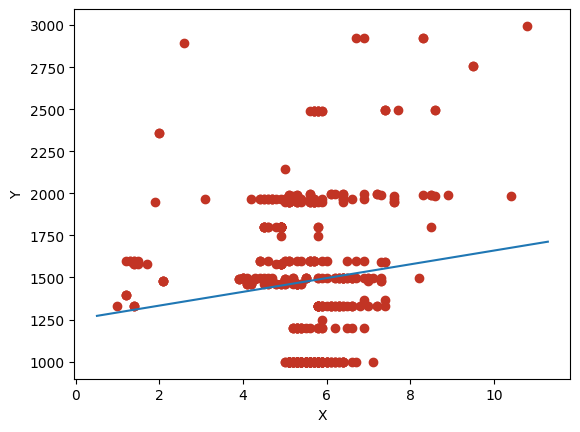

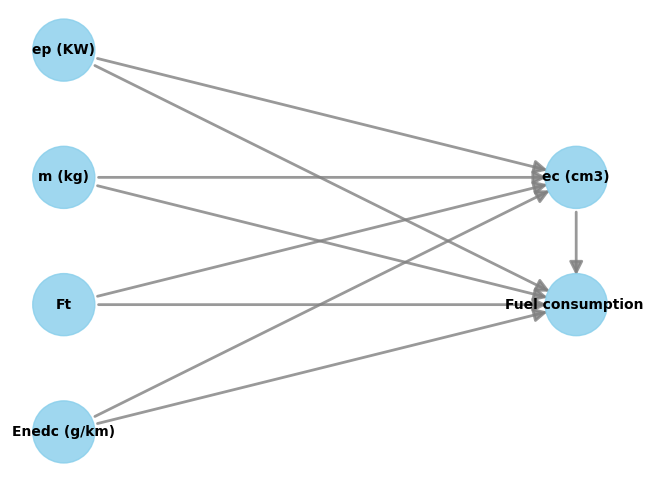

No directed path from ['Fuel consumption '] to ['ec (cm3)'] in the causal graph.
Causal effect is zero.
*** Causal Estimate ***

## Identified estimand
No directed path from ['Fuel consumption '] to ['ec (cm3)'] in the causal graph.
Causal effect is zero.
## Realized estimand
None
## Estimate
Mean value: 0



TypeError: 'NoneType' object is not subscriptable

In [1]:
from dowhy import CausalModel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def scatter_plot_with_correlation_line(x, y):
    plt.scatter(x, y, c="#c23424")
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.plot(X_plot, m * X_plot + b, "-")
    plt.show()

df = pd.read_csv("auto_co2_eur_21_raw.csv", nrows=1000, usecols=['ep (KW)', 'm (kg)', 'ec (cm3)', 'Ft', 'Fuel consumption ', 'Enedc (g/km)'])
print(df.columns)

df = df.dropna()
print(df)

scatter_plot_with_correlation_line(df["Fuel consumption "], df['ec (cm3)'])

# DoWhy: model creation

graph_1 = """graph [directed 1 node [id "ep (KW)" label "ep (KW)"] node [id "m (kg)" label "m (kg)"] node [id "ec (cm3)" label "ec (cm3)"]
node [id "Ft" label "Ft"] node [id "Fuel consumption " label "Fuel consumption "] node [id "Enedc (g/km)" label "Enedc (g/km)"]
edge [source "ep (KW)" target "Fuel consumption "] edge [source "m (kg)" target "Fuel consumption "] edge [source "ec (cm3)" target "Fuel consumption "]
edge [source "Ft" target "Fuel consumption "] edge [source "Enedc (g/km)" target "Fuel consumption "]
edge [source "ep (KW)" target "ec (cm3)"] edge [source "m (kg)" target "ec (cm3)"] edge [source "Ft" target "ec (cm3)"]
edge [source "Enedc (g/km)" target "ec (cm3)"]]"""

model = CausalModel(data=df, treatment="Fuel consumption ", outcome="ec (cm3)", graph=graph_1)
model.view_model()

estimand = model.identify_effect()
print(estimand)

estimate = model.estimate_effect(
    identified_estimand=estimand, method_name="backdoor.linear_regression"
)
print(estimate)

res_random = model.refute_estimate(
    estimand, estimate, method_name="random_common_cause"
)
print(res_random)